In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
import time


import OpenAEM
from helpers import biot_savart_1, biot_savart_2, biot_savart_3

In [2]:
rng = np.random.default_rng(seed=12345)

## Test correctness of implementation

In [3]:
p0 = np.array([0.0, 0.0, -0.5])
p1 = np.array([0.0, 0.0,  0.5])
rod = OpenAEM.DLS(p0, p1)
eddy = [rod]

behavior for points on a rod

In [7]:
npts = 10
xv = np.zeros((3, npts), dtype=float)
xv[2, :] = rng.uniform(-0.5, 0.5, npts)

uv_1 = biot_savart_1(eddy, xv)
uv_2 = biot_savart_2(eddy, xv)
uv_3 = biot_savart_3(eddy, xv)
if np.allclose(uv_2, uv_1) and np.allclose(uv_2, uv_3):
    print('Two implementations yield same results')
    if np.allclose(uv_1, np.zeros_like(uv_1)):
        print('The velocity is zero on a rod')

Two implementations yield same results
The velocity is zero on a rod


Test the velocity along positive $x$ axis

Two implementations yield same results


(-5.0, 45.0)

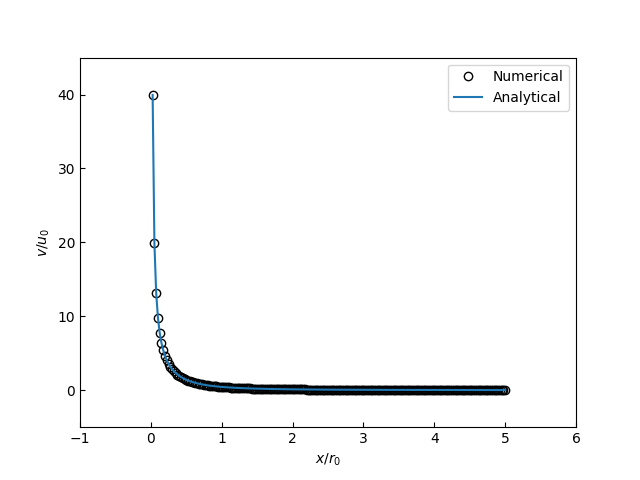

In [8]:
npts = 201
xv       = np.zeros((3, npts), dtype=float)
x = np.linspace(0, 5, npts)
xv[0, :] = x[:]

uv_1 = biot_savart_1(eddy, xv)
uv_2 = biot_savart_2(eddy, xv)
uv_3 = biot_savart_3(eddy, xv)
if np.allclose(uv_2, uv_1) and np.allclose(uv_2, uv_3):
    print('Two implementations yield same results')
    
uv = uv_1
plt.figure()
plt.plot(x[1:], uv[1, 1:], 'ko', label='Numerical', markerfacecolor='none')
plt.plot(x[1:], 1/x[1:]/np.sqrt(1 + 4*x[1:]**2), label='Analytical')
plt.xlabel(r'$x/r_0$')
plt.ylabel(r'$v/u_0$')
plt.tick_params(direction='in')
plt.legend()
plt.xlim(-1, 6)
plt.ylim(-5, 45)

Randomly select points to verify both implementations are consistent

In [9]:
npts = 100
xv = rng.uniform(-5, 5, (3, npts))

uv_1 = biot_savart_1(eddy, xv)
uv_2 = biot_savart_2(eddy, xv)
uv_3 = biot_savart_3(eddy, xv)
if np.allclose(uv_2, uv_1) and np.allclose(uv_2, uv_3):
    print('Two implementations yield same results')

Two implementations yield same results


## Speedup by vectorization

In [7]:
p0 = np.array([0.0, 0.0, -0.5])
p1 = np.array([0.0, 0.0,  0.5])
rod = OpenAEM.DLS(p0, p1)
eddy = [rod]

In [13]:
npts = 128*128*128
xv = rng.uniform(-5, 5, (3, npts))
start_time = time.time()
uv = biot_savart_1(eddy, xv)
end_time = time.time()
print(f'{(end_time - start_time)/npts:7.2e} seconds per evaluation for a unit length rod with default discretization')
elapsed_1 = end_time - start_time

7.58e-06 seconds per evaluation for a unit length rod with default discretization


In [15]:
npts = 128*128*128
xv = rng.uniform(-5, 5, (3, npts))
start_time = time.time()
uv = biot_savart_2(eddy, xv)
end_time = time.time()
print(f'{(end_time - start_time)/npts:7.2e} seconds per evaluation for a unit length rod with default discretization')
elapsed_2 = end_time - start_time

7.53e-05 seconds per evaluation for a unit length rod with default discretization


In [18]:
npts = 256*256*256
xv = rng.uniform(-5, 5, (3, npts))
start_time = time.time()
uv = biot_savart_3(eddy, xv)
end_time = time.time()
print(f'{(end_time - start_time)/npts:7.2e} seconds per evaluation for a unit length rod with default discretization')
elapsed_3 = end_time - start_time